In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('reset -f')  
except:
    pass
from IPython import get_ipython
ipython = get_ipython().magic
import io
import os
import sys
os.chdir('/Users/markprosser/Desktop/PythonScripts')
import MCP_functions as MCP
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.close("all")
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import savReaderWriter as spss
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import pylab
import seaborn as sns

In [2]:
df1 = pd.read_excel("/Users/markprosser/Desktop/MScSTATS/assessment/data.xlsx")

In [3]:
df1.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp
0,Afghanistan,6,4,33.366148,26,32758020,652860,19990.31716,473,-9.0,26.00
1,Albania,2,2,8.678753,56,2889104,27400,12768.22939,-92,29.0,25.50
2,Algeria,4,2,201.685126,70,39113313,2381740,182889.35450,-143,-9.0,27.00
3,Andorra,2,1,0.496379,86,79223,470,NaN,-9,-9.0,24.55
4,Angola,7,2,252.092930,43,26920466,1246700,100886.28660,102,42.7,-9.00


In [4]:
df1['ghgpc'] = df1['GHG'] / (df1['Population (People)']/1000000)

In [17]:
df1.tail()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
177,"Venezuela, RB",3,2,337.535041,89,30738378,882050,NaN,-69,46.9,2.1,10.980900
178,Vietnam,1,3,251.945226,33,90728900,310070,144834.68890,-200,38.7,21.8,2.776902
179,"Yemen, Rep.",4,3,34.008206,34,26246327,527970,28900.28849,-50,-9.0,-9.0,1.295732
180,Zambia,7,3,379.890668,40,15620974,743390,25318.83846,-34,55.6,25.4,24.319269
181,Zimbabwe,7,4,63.791731,33,15411675,386850,14372.13260,-220,43.2,-9.0,4.139182


In [18]:
print(len(df1))
df1 = df1.dropna(subset=['GHG'])
print(len(df1))
df1 = df1.dropna(subset=['Population (People)'])
print(len(df1))

182
182
182


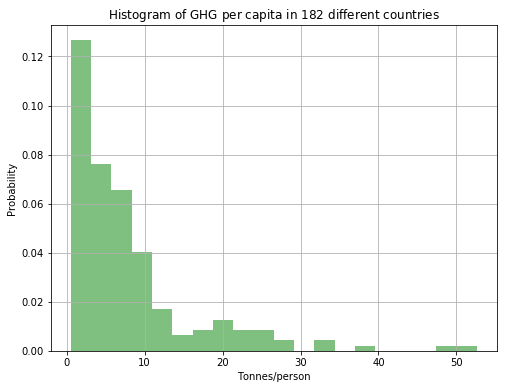

In [12]:
x = df1['ghgpc'].dropna().tolist()
plt.figure(1, figsize=(8, 6));
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Tonnes/person')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ GHG\ per\ capita\ in\ 182\ different\ countries}$')
plt.grid(True)
plt.show()

In [8]:
print('Mean of ghgpc is:')
print(df1['ghgpc'].mean())
print('')
print('Median of ghgpc is:')
print(df1['ghgpc'].median())
print('')
# print('Mode of ghgpc is:')
# print(df1['ghgpc'].mode())
# print('')
print('Stdev of ghgpc is:')
print(df1['ghgpc'].std())
print('')
print('Max of ghgpc is:')
print(df1['ghgpc'].max())
print('')
print('Min of ghgpc is:')
print(df1['ghgpc'].min())
print('')
print('Range of ghgpc is:')
print(df1['ghgpc'].max()-df1['ghgpc'].min())
print('')
print('Var of ghgpc is:')
print(df1['ghgpc'].var())
print('')
print('Quantile of ghgpc is:')
print(df1['ghgpc'].quantile([0.25, 0.5, 0.75]))

Mean of ghgpc is:
7.935571770214615

Median of ghgpc is:
5.478352076653998

Stdev of ghgpc is:
8.418009179045622

Max of ghgpc is:
52.5993961057

Min of ghgpc is:
0.532735932487

Range of ghgpc is:
52.0666601732

Var of ghgpc is:
70.86287853849636

Quantile of ghgpc is:
0.25    2.475999
0.50    5.478352
0.75    9.661915
Name: ghgpc, dtype: float64


In [9]:
#to find global median, mean
totghg = sum(df1['GHG'].tolist())
print(totghg)
totpop = sum(df1['Population (People)'].tolist())
print(totpop)
meanghgpc = (totghg*1000000) / totpop
print(meanghgpc)

47495.51869248402
7167144722
6.626839632063456


In [10]:
df2 = pd.DataFrame.copy(df1)
df2 = df2.sort_values(by='ghgpc', ascending=True)
# df2['cumpop'] = 'NaN'
df2 = df2.reset_index(drop=True)
df2['cumpop'] = 'NaN'
df2['cumpop'][0] = df2['Population (People)'][0]
df2

for i in range(1, len(df2)):
     df2['cumpop'][i] = df2['cumpop'][i-1] + df2['Population (People)'][i]
    
df2.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc,cumpop
0,Costa Rica,3,2,2.534531,76,4757575,51060,43186.481740,20,49.2,25.25,0.532736,4757575
1,Burundi,7,4,5.558833,12,9891790,25680,2404.713060,40,33.4,-9.00,0.561964,14649365
2,Comoros,7,4,0.464842,28,759385,1861,592.198663,-10,55.9,5.60,0.612129,15408750
3,Kenya,7,3,29.294122,25,46024250,569140,49505.467340,-50,48.5,25.85,0.636493,61433000
4,Rwanda,7,4,7.589997,28,11345357,24670,7632.576654,-75,50.4,11.50,0.668996,72778357


In [11]:
df2[97:100]
#lives in mexico
df2['ghgpc'][98]

5.8693550799538894

#sample answer 1
Descriptive statistics for per capita annual greenhouse gas emissions (tonnes per person) for 182 countries.

Here is a histogram of the data
"histogram here"

#########central tendency
if we treat every country as having equal population we get a 
mean = 7.94 tonnes/GHG/year/capita 
median = 5.48 tonnes, 

however if we take into account that countries populations vary then

mean = 6.63 tonnes
median = 5.87 tonnes (middle man living in Mexico)

#########dispersion
if we treat each country as having equal population we get a
standard deviation of 

taking into account the varying populations would have made the standard deviation calculation hard as it would have involved creating a dataset 7 billion long.

Even this wouldn't true global per capita GHG emissions as it fails to take into account that not everyone within a given country will have the same emissions - no actually it will as more or less...

In [12]:
df3 = pd.DataFrame.copy(df1)
df3 = df3.sort_values(by='Region', ascending=True)
df3.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
129,Philippines,1,3,121.338722,44,100102249,298170,2.508381e+05,-700,43.0,5.65,1.212148
27,Cambodia,1,3,52.617046,21,15270790,176520,1.485816e+04,-150,30.8,8.65,3.445601
135,Samoa,1,3,0.470930,19,192290,2830,6.777549e+02,-13,42.7,27.65,2.449064
32,China,1,2,11600.629250,54,1364270000,9388211,8.333287e+06,-1800,42.2,26.70,8.503177
168,Tuvalu,1,2,0.017971,59,10908,30,3.580577e+01,-9,41.1,27.15,1.647467


In [13]:
#boxplot by regions is a good chart for qu2
#or would a bar chart be better?
#do we have to worry about error bars, surely we are doing population mean not sample mean?
#should set up null hypothesis
#if not normal, try ln() or 2 others?
#assumptions of Anova 8_15 qq histogram, kolm/smir, shap-wilk
#kruskal wallis if not normal +dunnn bonferroni?
#post hoc multiple comparison tests

In [14]:
df3.groupby(['Region']).mean()

,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
Region,,,,,,,,,,
1,2.321429,647.906957,51.321429,7.970581e+07,8.676512e+05,7.174369e+05,-57.321429,23.760714,17.046429,8.636066
2,1.510204,151.675876,65.918367,1.797772e+07,5.466755e+05,4.631736e+05,121.714286,30.312245,15.646939,7.609717
3,2.031250,123.368119,59.812500,1.883211e+07,6.027187e+05,1.660499e+05,-68.750000,32.521875,17.367187,9.280165
4,1.900000,165.082188,75.850000,2.083641e+07,5.615000e+05,1.671104e+05,-8.450000,3.290000,10.172500,13.633096
5,1.000000,3593.010337,81.500000,1.770540e+08,9.120465e+06,8.978533e+06,3092.000000,37.400000,3.200000,22.113908
6,3.142857,555.045809,30.000000,2.458663e+08,6.762086e+05,3.712456e+05,-898.571429,28.485714,17.371429,1.995484
7,3.386364,81.846388,39.204545,2.181695e+07,5.285376e+05,3.681976e+04,-54.250000,41.629545,13.730682,4.585561


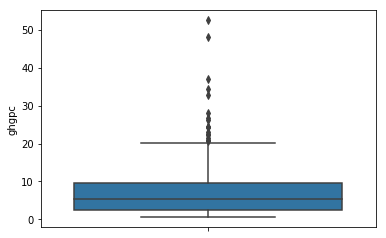

In [19]:

 
# Make boxplot for one group only
sns.boxplot( y=df1["ghgpc"] )
plt.show()

In [15]:
df30 = pd.DataFrame.copy(df1)
df30.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
0,Afghanistan,6,4,33.366148,26,32758020,652860,19990.31716,473,-9.0,26.00,1.018564
1,Albania,2,2,8.678753,56,2889104,27400,12768.22939,-92,29.0,25.50,3.003960
2,Algeria,4,2,201.685126,70,39113313,2381740,182889.35450,-143,-9.0,27.00,5.156432
3,Andorra,2,1,0.496379,86,79223,470,NaN,-9,-9.0,24.55,6.265587
4,Angola,7,2,252.092930,43,26920466,1246700,100886.28660,102,42.7,-9.00,9.364360


In [16]:
df30 = df30.replace(-9.0, np.nan)
df30.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
0,Afghanistan,6,4,33.366148,26.0,32758020,652860,19990.31716,473.0,NaN,26.00,1.018564
1,Albania,2,2,8.678753,56.0,2889104,27400,12768.22939,-92.0,29.0,25.50,3.003960
2,Algeria,4,2,201.685126,70.0,39113313,2381740,182889.35450,-143.0,NaN,27.00,5.156432
3,Andorra,2,1,0.496379,86.0,79223,470,NaN,NaN,NaN,24.55,6.265587
4,Angola,7,2,252.092930,43.0,26920466,1246700,100886.28660,102.0,42.7,NaN,9.364360


In [17]:
df30['popdens'] = df30['Population (People)'] / df30['area']
df30['GDPpercap'] = df30['GDP'] / df30['Population (People)']
df30['netmigrationpercap'] = df30['netmigration'] / df30['Population (People)']

# df30['lnpopdens'] = np.log(df30['popdens'])
# df30['lnarea'] = np.log(df30['area'])
# df30['lnGDPpercap'] = np.log(df30['GDPpercap'])
# df30['lngini'] = np.log(df30['gini'])

# missing values

In [18]:
# print(df30[df30 == np.nan].count())
df30.isnull().sum(axis=0)

Country                 0
Region                  0
Incomegroup             0
GHG                     0
percurbanpopulation     1
Population (People)     0
area                    0
GDP                     7
netmigration            8
gini                   38
annual_temp            24
ghgpc                   0
popdens                 0
GDPpercap               7
netmigrationpercap      8
dtype: int64

# negative values

In [19]:
print(df30[df30 <  0].count())

Country                182
Region                   0
Incomegroup              0
GHG                      0
percurbanpopulation      0
Population (People)      0
area                     0
GDP                      0
netmigration           106
gini                     0
annual_temp              1
ghgpc                    0
popdens                  0
GDPpercap                0
netmigrationpercap     106
dtype: int64


In [20]:
df30.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc,popdens,GDPpercap,netmigrationpercap
0,Afghanistan,6,4,33.366148,26.0,32758020,652860,19990.31716,473.0,NaN,26.00,1.018564,50.176179,0.000610,0.000014
1,Albania,2,2,8.678753,56.0,2889104,27400,12768.22939,-92.0,29.0,25.50,3.003960,105.441752,0.004419,-0.000032
2,Algeria,4,2,201.685126,70.0,39113313,2381740,182889.35450,-143.0,NaN,27.00,5.156432,16.422159,0.004676,-0.000004
3,Andorra,2,1,0.496379,86.0,79223,470,NaN,NaN,NaN,24.55,6.265587,168.559574,NaN,NaN
4,Angola,7,2,252.092930,43.0,26920466,1246700,100886.28660,102.0,42.7,NaN,9.364360,21.593379,0.003748,0.000004


In [21]:
# from pandas import ExcelWriter
# writer = ExcelWriter('/Users/markprosser/Desktop/CWPythonExport.xlsx')
# df30.to_excel(writer,'Sheet1')

# %urban

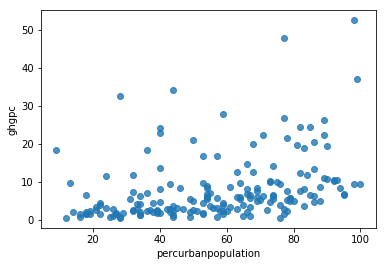

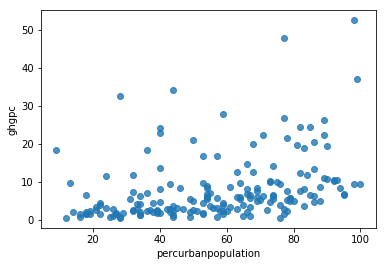

182
181


In [22]:
df31 = pd.DataFrame.copy(df30)
# df5 = df5.dropna(subset=['amount'])
sns.regplot(x=df31["percurbanpopulation"], y=df31["ghgpc"], fit_reg=False)
plt.show()

df31a = pd.DataFrame.copy(df31)
df31a = df31a[df31a.percurbanpopulation.isnull() != 1]
sns.regplot(x=df31a["percurbanpopulation"], y=df31a["ghgpc"], fit_reg=False)
plt.show()

print(len(df31))
print(len(df31a))

# pop density

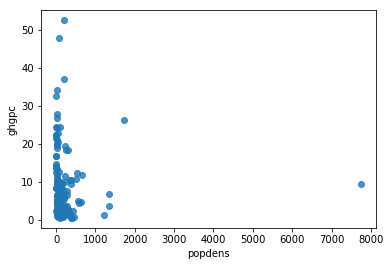

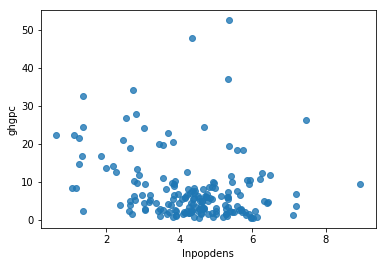

182
182


In [23]:

df32 = pd.DataFrame.copy(df30)
df32.head()
sns.regplot(x=df32["popdens"], y=df32["ghgpc"], fit_reg=False)
plt.show()

df32b = pd.DataFrame.copy(df32)
df32b['lnpopdens'] = np.log(df32b["popdens"])
df32b['rootpopdens'] = (df32b["popdens"])**0.5
df32b['recippopdens'] = 1/(df32b["popdens"])

sns.regplot(x=df32b["lnpopdens"], y=df32b["ghgpc"], fit_reg=False)
plt.show()

# sns.regplot(x=df32b["rootpopdens"], y=df32b["ghgpc"], fit_reg=False)
# plt.show()

# sns.regplot(x=df32b["recippopdens"], y=df32b["ghgpc"], fit_reg=False)
# plt.show()

print(len(df32))
print(len(df32b))

# area

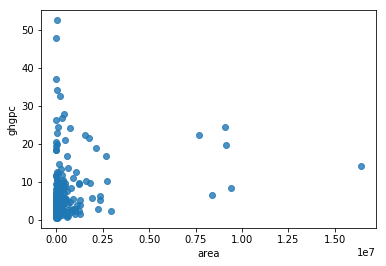

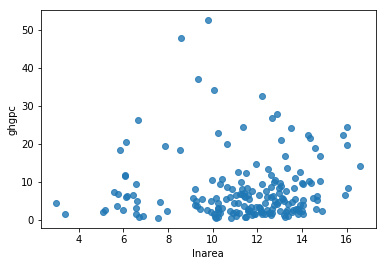

182
182


In [24]:
df33 = pd.DataFrame.copy(df30)
sns.regplot(x=df33["area"], y=df33["ghgpc"], fit_reg=False)
plt.show()

df33b = pd.DataFrame.copy(df33)
df33b['lnarea'] = np.log(df33b["area"])
df33b['rootarea'] = (df33b["area"])**0.5
df33b['reciparea'] = 1/(df33b["area"])

sns.regplot(x=df33b["lnarea"], y=df33b["ghgpc"], fit_reg=False)
plt.show()

# sns.regplot(x=df33b["rootarea"], y=df33b["ghgpc"], fit_reg=False)
# plt.show()

# sns.regplot(x=df33b["reciparea"], y=df33b["ghgpc"], fit_reg=False)
# plt.show()

print(len(df33))
print(len(df33b))

# gdp per cap

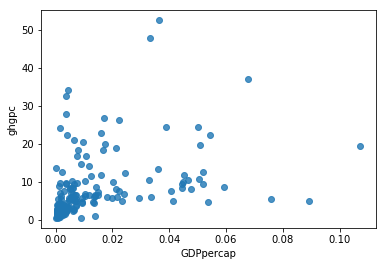

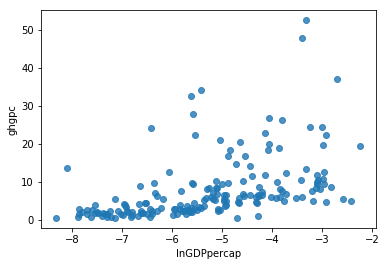

182
182


In [25]:
df34 = pd.DataFrame.copy(df30)
sns.regplot(x=df34["GDPpercap"], y=df34["ghgpc"], fit_reg=False)
plt.show()

df34b = pd.DataFrame.copy(df34)
df34b['lnGDPpercap'] = np.log(df34b["GDPpercap"])
df34b['rootGDPpercap'] = (df34b["GDPpercap"])**0.5
df34b['recipGDPpercap'] = 1/(df34b["GDPpercap"])

sns.regplot(x=df34b["lnGDPpercap"], y=df34b["ghgpc"], fit_reg=False)
plt.show()

# sns.regplot(x=df34b["rootGDPpercap"], y=df34b["ghgpc"], fit_reg=False)
# plt.show()

# sns.regplot(x=df34b["recipGDPpercap"], y=df34b["ghgpc"], fit_reg=False)
# plt.show()

print(len(df34))
print(len(df34b))

# net migration per cap

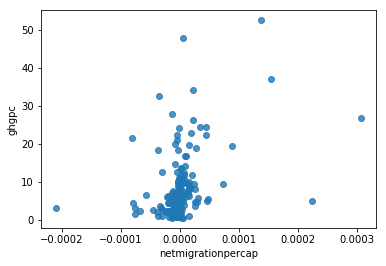

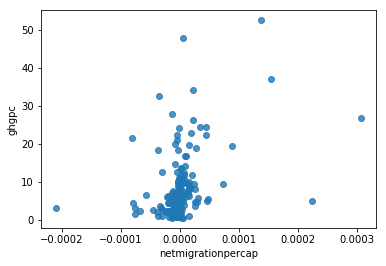

182
174


In [26]:
df35 = pd.DataFrame.copy(df30)
sns.regplot(x=df35["netmigrationpercap"], y=df35["ghgpc"], fit_reg=False)
plt.show()

df35a = pd.DataFrame.copy(df35)
df35a = df35a[df35a.netmigrationpercap.isnull() != 1]
sns.regplot(x=df35a["netmigrationpercap"], y=df35a["ghgpc"], fit_reg=False)
plt.show()


# df35b = pd.DataFrame.copy(df35a)
# df35b['lnnetmigrationpercap'] = np.log(df35b["netmigrationpercap"])
# df35b['rootnetmigrationpercap'] = (df35b["netmigrationpercap"])**0.5
# df35b['recipnetmigrationpercap'] = 1/(df35b["netmigrationpercap"])
# df35b['rootlnnetmigrationpercap'] = (np.log(df35b["netmigrationpercap"]))**0.5

# sns.regplot(x=df35b["lnnetmigrationpercap"], y=df35b["ghgpc"], fit_reg=False)
# plt.show()

# sns.regplot(x=df35b["rootnetmigrationpercap"], y=df35b["ghgpc"], fit_reg=False)
# plt.show()

# sns.regplot(x=df35b["recipnetmigrationpercap"], y=df35b["ghgpc"], fit_reg=False)
# plt.show()

# sns.regplot(x=df35b["rootlnnetmigrationpercap"], y=df35b["ghgpc"], fit_reg=False)
# plt.show()

print(len(df35))
print(len(df35a))
# print(len(df35b))

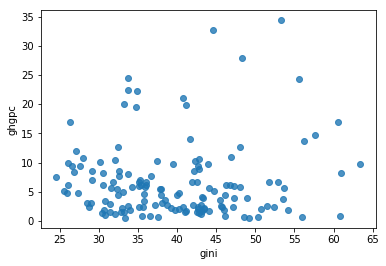

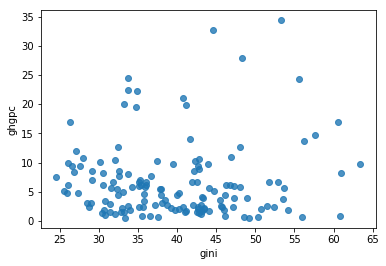

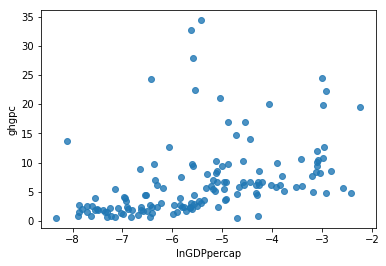

182
144
144


In [27]:
df36 = pd.DataFrame.copy(df30)
sns.regplot(x=df36["gini"], y=df36["ghgpc"], fit_reg=False)
plt.show()

df36a = pd.DataFrame.copy(df36)
df36a = df36a[df36a.gini.isnull() != 1]
sns.regplot(x=df36a["gini"], y=df36a["ghgpc"], fit_reg=False)
plt.show()

df36b = pd.DataFrame.copy(df36a)
df36b['lnGDPpercap'] = np.log(df36b["GDPpercap"])
df36b['rootGDPpercap'] = (df36b["GDPpercap"])**0.5
df36b['recipGDPpercap'] = 1/(df36b["GDPpercap"])

sns.regplot(x=df36b["lnGDPpercap"], y=df36b["ghgpc"], fit_reg=False)
plt.show()

print(len(df36))
print(len(df36a))
print(len(df36b))

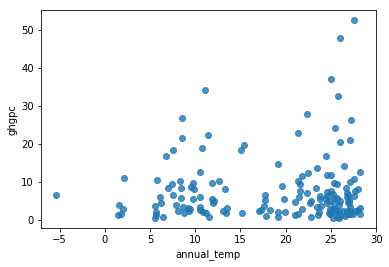

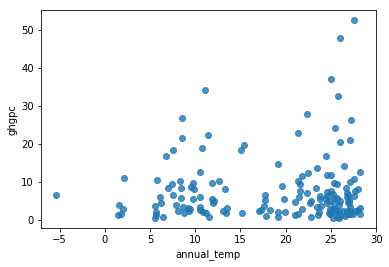

182
158


In [28]:
df37 = pd.DataFrame.copy(df30)
sns.regplot(x=df37["annual_temp"], y=df37["ghgpc"], fit_reg=False)
plt.show()

df37a = pd.DataFrame.copy(df37)
df37a = df37a[df37a.annual_temp.isnull() != 1]
sns.regplot(x=df37a["annual_temp"], y=df37a["ghgpc"], fit_reg=False)
plt.show()

print(len(df37))
print(len(df37a))

In [29]:
df40 = pd.DataFrame.copy(df1)
df40 = df40.replace(-9.0, np.nan)
df40.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
0,Afghanistan,6,4,33.366148,26.0,32758020,652860,19990.31716,473.0,NaN,26.00,1.018564
1,Albania,2,2,8.678753,56.0,2889104,27400,12768.22939,-92.0,29.0,25.50,3.003960
2,Algeria,4,2,201.685126,70.0,39113313,2381740,182889.35450,-143.0,NaN,27.00,5.156432
3,Andorra,2,1,0.496379,86.0,79223,470,NaN,NaN,NaN,24.55,6.265587
4,Angola,7,2,252.092930,43.0,26920466,1246700,100886.28660,102.0,42.7,NaN,9.364360


In [30]:
df40['popdens'] = df40['Population (People)'] / df40['area']
df40['GDPpercap'] = df40['GDP'] / df40['Population (People)']
df40['netmigrationpercap'] = df40['netmigration'] / df40['Population (People)']

df40['lnpopdens'] = np.log(df40['popdens'])
df40['lnarea'] = np.log(df40['area'])
df40['lnGDPpercap'] = np.log(df40['GDPpercap'])
df40['lngini'] = np.log(df40['gini'])

df40 = df40.replace(np.nan, -9)

df40.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc,popdens,GDPpercap,netmigrationpercap,lnpopdens,lnarea,lnGDPpercap,lngini
0,Afghanistan,6,4,33.366148,26.0,32758020,652860,19990.31716,473.0,-9.0,26.00,1.018564,50.176179,0.000610,0.000014,3.915540,13.389118,-7.401655,-9.000000
1,Albania,2,2,8.678753,56.0,2889104,27400,12768.22939,-92.0,29.0,25.50,3.003960,105.441752,0.004419,-0.000032,4.658159,10.218298,-5.421742,3.367296
2,Algeria,4,2,201.685126,70.0,39113313,2381740,182889.35450,-143.0,-9.0,27.00,5.156432,16.422159,0.004676,-0.000004,2.798632,14.683342,-5.365337,-9.000000
3,Andorra,2,1,0.496379,86.0,79223,470,-9.00000,-9.0,-9.0,24.55,6.265587,168.559574,-9.000000,-9.000000,5.127289,6.152733,-9.000000,-9.000000
4,Angola,7,2,252.092930,43.0,26920466,1246700,100886.28660,102.0,42.7,-9.00,9.364360,21.593379,0.003748,0.000004,3.072387,14.036011,-5.586648,3.754199


In [31]:
# from pandas import ExcelWriter
# writer = ExcelWriter('/Users/markprosser/Desktop/CW2.xlsx')
# df40.to_excel(writer,'Sheet1')

# qu2


In [32]:
df1.head()

,Country,Region,Incomegroup,GHG,percurbanpopulation,Population (People),area,GDP,netmigration,gini,annual_temp,ghgpc
0,Afghanistan,6,4,33.366148,26,32758020,652860,19990.31716,473,-9.0,26.00,1.018564
1,Albania,2,2,8.678753,56,2889104,27400,12768.22939,-92,29.0,25.50,3.003960
2,Algeria,4,2,201.685126,70,39113313,2381740,182889.35450,-143,-9.0,27.00,5.156432
3,Andorra,2,1,0.496379,86,79223,470,NaN,-9,-9.0,24.55,6.265587
4,Angola,7,2,252.092930,43,26920466,1246700,100886.28660,102,42.7,-9.00,9.364360


In [35]:
df50 = pd.DataFrame.copy(df1)
df50['lnghgpc'] = np.log(df50['ghgpc'])

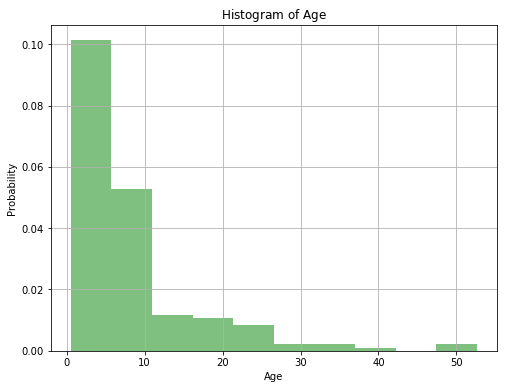

In [33]:
x = df1['ghgpc'].dropna().tolist()
plt.figure(3, figsize=(8, 6));
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age}$')
plt.grid(True)
plt.show()

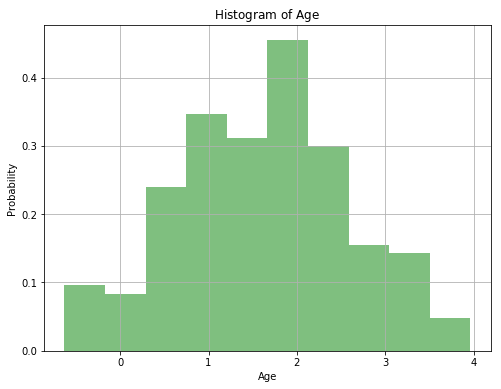

In [37]:
x = df50['lnghgpc'].dropna().tolist()
plt.figure(3, figsize=(8, 6));
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age}$')
plt.grid(True)
plt.show()

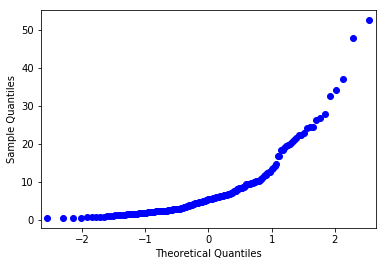

In [38]:
sm.qqplot(df50['ghgpc'])#, line='r')
pylab.show()

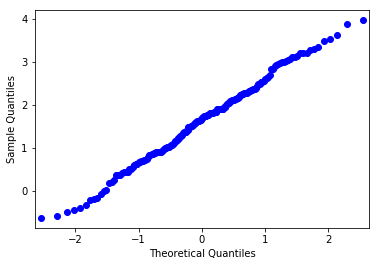

In [39]:
sm.qqplot(df50['lnghgpc'])#, line='r')
pylab.show()

In [40]:
#Kolmogorov-Smirnov
stats.kstest(df50['ghgpc'].dropna(), 'norm', N=20, alternative='two-sided', mode='approx')

KstestResult(statistic=0.84117064615143866, pvalue=0.0)

In [41]:
#Kolmogorov-Smirnov
stats.kstest(df50['lnghgpc'].dropna(), 'norm', N=20, alternative='two-sided', mode='approx')

KstestResult(statistic=0.59746240741156309, pvalue=0.0)

In [42]:
stats.shapiro(df50['ghgpc'].dropna(), a=None, reta=False)

(0.7404972910881042, 1.3662333066279505e-16)

In [43]:
stats.shapiro(df50['lnghgpc'].dropna(), a=None, reta=False)

(0.9926860928535461, 0.49515366554260254)